# 7. Neural Networks

Neural networks (NNs) are a biologically-inspired programming paradigm that allows machines to learn from observational data. A NN is a parametric supervised model, that is a model that uses labeled training data to optimise its intrinsic parameters and produce a model. The power of these networks stems from the mathematical proof that an infinitely complex network can, in theory, represent any arbitrary function mapping feature variables to a target output. This means that unlike, for example, polynomial regression, we do not need to know anything about the functional form of the mapping we're trying to model in advance. This means that neural networks can learn highly complex mappings to perform tasks such as image recognition, speech recognition and natural language processing. Another benefit of NN's is their highly modular nature, meaning that countless network architectures are available for tackling specific problems, such as convolutional, recurrent and spiking NN's. The application of these architectures is the subject of deep learning and is far beyond the scope of this textbook. Here we introduce the basic concepts of NN's and explain the backpropagation algorithm which allows them to be optimised using training data.

## 7.1 Perceptron

A neural network is composed of layers of *neurons*, that is nodes in the network with an associated number called their *activation*. Each neuron is connected to the neurons in the adjacent layers through *synapses* with an associated *weight*, which defines the strength of the connection. The simplest possible neural network is called a perceptron, shown below, and is composed of three layers:

<img src="img/perceptron.png" width=300>

- Input Layer: The first layer is called the input layer, with one neuron for each feature variable in the training dataset. When a set of features is passed into the network, each neuron in the input layer has an _activation_ equal to the correponding variable. We can call the activations in the input layer of the example below $a^1_j$. The upper index represents the layer, while j indexes the neurons.


- Hidden Layer: The neurons in the hidden layer are connected to each neuron in the input layer through synapses with associated weights. The activation of a neuron in the hidden layer is the sum of the activations in the previous layer multiplied by the weights of their connecting synapses, plus a _bias_ characteric of that hidden neuron. In the example perceptron, we can call the weights of the synapses between the input layer and the hidden layer $w^2_{jk}$, so that the weight of the synapse connecting the first neuron in the input layer to the second neuron in the hidden layer is $w^2_{12}$. We can similarly label the biases as $b^l_j$ so that the bias of the second neuron in the hidden layer is $b^2_2$. The activation of the second neuron in the hidden layer is then $a^2_2 = a^1_1 w^2_{12} + a^1_2 w^2_{22} + b^2_2$.


- Output Layer: Neurons in the output layer have an activation corresponding to the predicted target value. The activation is again determined as the sum of the activations in the previous layer multiplied by the weights of their associated synapses, plus the bias. For a simple regression problem, the output layer will contain only one neuron. For a multiclass classification problem, the output layer will contain as many neurons as there are classes in the target variable. The predicted class then correponds to the output neuron with the largest activation.

In this way, data introduced in the input layer is propagated forward through synapses into subsequent layers. The information from the input is reduced and encoded as a pattern in the next layer, and that information is processed again and encoded in the layer after that, until the output layer generates a prediction of what the input data represents. The process of optimising the weights and biases of a network to achieve a desired output is known as training.

Forward propagating neural networks with more than one layer are called **Multi-layer Perceptrons**, and are the main focus of this chapter.

## 7.2 Training as Convex Optimisation

To measure its performance, the network uses an associated *cost* or *loss* function, which is some monotonically increasing function of the errors between the target values predicted by the model and the actual values in the training set. 

The loss of a network is a function of its parameters (weights and biases), and of the entire training dataset. If we imagine a network with just two parameters (x and y), then we can imagine a cost associated with each combination of x and y for a given training set, which we can associate with the coordinate z. The loss is then a surface in 3D space, as shown in the figure below. The process of *optimising* the network corresponds to finding the combination of parameters (x and y) that correspond to the *global minimum* of the surface z.

In reality, there are far more than two parameters for any neural network model, so z is generally a hypersurface in n+1-dimensional space for n parameters, however the principle of finding the combination of parameters that minimises the loss function remains the same.

<img src="img/convex-optimisation.png" width=600>

Finding the minimum is done through a process called gradient descent. The gradient is a *vector* with direction parallel to the path of steepest descent and magnitude proportional to the change in loss caused by an infinitesimal step in that direction. At each training iteration, we calculate the gradient for the current combination of parameters, and change those parameters slightly along the direction of steepest descent. If the vector of parameters is $\mathbf v$, the gradient descent algorithm works as follows:

1. For current parameters $\mathbf v_t$, calculate the gradient $\nabla loss(\mathbf v_t)$
2. Update the parameters according to the gradient $\mathbf v_{t+1} = \mathbf v_t - \alpha \nabla loss(\mathbf v_t)$
3. Repeat until maximum iterations, or gradient falls below a preset threshold.

The symbol $\nabla$ represents the gradient operator, while the subscript $t$ in $\mathbf v_t$ represents the iteration number. $\alpha$ is a parameter controlling the size of the step taken at each iteration, called learning rate.

In neural networks, finding the path of gradient descent is done through an algorithm called backpropagation.

The most commonly used cost functions are the Mean Squared Error (quadratic cost) and Cross-Entropy. A quadratic cost function can exhibit large flat areas far from the optimum, leading to longer learning times since the gradient in these areas is very small. Cross-entropy mitigates this effect, maximising the gradient even when random initialisation of the network produces parameters that are far from the minimum.

There are three general types of gradient descent in neural networks:

- Stochastic Gradient Descent (SGD): The gradient at each iteration is estimated using just one training example.
- Mini-batch Gradient Descent: The gradient at each iteration is estimated using a small sample of training examples.
- Batch Gradient Descent: The gradient at each iteration is calculated using all training examples.

Since gradient descent follows the steepest path to the closest minimum, it's possible for the algorithm to get stuck in *local minima* that are far from the global optimum. For this reason, adding randomness to the path of descent using stochastic and mini-batch methods can help ensure that the algorithm converges on a global minimum.

## 7.3 Nonlinearity and Activation Functions

So far, everything we've seen has been a linear operation of the input data. Activations are a *linear combination* of the activations in the previous layer. Like in linear regression, we multiply the input variables by coefficients and add a bias (or intercept) when propagating information forward through the network. In order to learn complex, nonlinear functions, we need to introduce nonlinearities into our model. Enter the activation function.

Activation functions are nonlinear functions that take the weighted sum of activations in the previous layer (plus the bias) as input and return the activation of a neuron. If the activation function for the hidden layer in the perceptron above is $\sigma(x)$, then the activation of the second neuron in the hidden layer becomes $a^h_2 = \sigma(a^i_1 w^i_{12} + a^i_2 w^i_{22} + b^h_2)$.

Many different activation functions are commonly used, and are presented in the table below. The activation functions have different strengths and weaknesses.

<img src="img/activation.png" width=600>

The **sigmoid** and **tanh** activation functions confine the activations of neurons to a fixed interval, which is useful for avoiding exploding activations and is particularly attractive for classification problems where we want a value between 0 and 1. However, they are computationally expensive to compute during training, as are their gradients.

The **ReLU** activation function, on the other hand, is extremely easy to evaluate, and the gradient is a simple step function. Both the sigmoid and ReLU activation functions have the added issue of *bias shift*, where the strictly positive activation causes large biases in subsequent layers to slow down learning. All three of these activations also have the issue of vanishing gradient, where neurons with very positive or very negative activations have a near-zero gradient. This means the weights associated with those neurons will cease to change significantly at each training iteration, leading to *dead neurons*.

**Leaky ReLU** addresses the vanishing gradient issue by introducing a small gradient for activations below 0. However, leaky ReLU and ReLU can still have a difficult time identifying true nonlinearities (in the sense of curvature) as they are not truly nonlinear (they are stepwise linear functions). Conversely, true nonlinear functions like tanh and the sigmoid can have trouble identifying linear relationships, while for ReLU or leaky ReLU it's very easy. the **ELU** activation function combines the best of both worlds by introducing a nonlinear gradient below zero while also avoiding the vanishing gradient problem. Its main limitation is the computation involved in evaluating the function below zero.

A **maxout** layer is simply a layer where the activation function is the maximum of the inputs. This is particularly useful when using a regularisation method called dropout. We will talk more about dropout and regularisation further on.

## 7.4 Overfitting and Regularisation in Neural Networks: L1, L2 and Dropout

Fundamental to the process of building models is the assumption of uncorrelated noise and the central-limit theorem. The former tells us that noise of a system is random with zero-mean and is unrelated to the signal. The latter tells us that we can view the noise as deriving from a normal distribution. In principle, regression and classification models should have sufficient data to *average out* the noise and learn the underlying signal. This is why having a sufficiently large dataset is so important to building generalisable models.

Since a sufficiently complex neural network can theoretically model any function, it can be extremely easy to overfit the model such that it learns the noise and loses its ability to generalise to new data. To mitigate this, we can restrict the complexity of the network (number of layers, number of neurons) or we can artificially inflate the training data.

There are also many regularisation methods that can be understood as penalising roughness in the model. One common cause of overfitting is collinearity in the input data, since it creates more degrees of freedom along a certain dimension to overcomplicate the model. L1 and L2 regularisation are two methods of addressing colinearity in neural networks that penalise large synaptic weights by adding a term to the cost function.

### 7.4.1 L2 Regularisation

A regression model that uses L2 regularisation is called **Ridge regression**, and includes the “squared magnitude” of coefficients as penalty term to the loss function. The L2 regularization element which penalises large weights is:

$$\lambda \sum_{i,j,k=1}^{n,m,p}(w^i_{jk})^2$$

Here, if lambda is zero then we get back the regular cost function. Ridge regression shrinks the weights of the model and it helps to reduce complexity and multi-collinearity

### 7.4.2 L1 Regularisation

A regression model that uses L1 regularization technique is called **Lasso regression**. Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

$$\lambda \sum_{i,j,k=1}^{n,m,p}|w^i_{jk}|$$

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero, thus removing some feature altogether. So Lasso regression not only helps mitigate over-fitting, but also aids with feature selection where the are a large number of input variables.

### 7.4.3 Dropout

Another cause of over-fitting in neural networks is the development of co-dependency between neurons, which can lead to inefficiencies in the network and overfitting. A simple solution to this is to randomly switch off a portion of neurons in hidden layers during forwards and backwards passes, mimicking unavailable pathways and forcing some redundancy in the system. This means neurons cannot develop co-dependent tendencies as a dependent neuron may be inactive at some training iterations. This process is called dropout, and serves to mitigate both overfitting and inefficiency. 

## 7.5 Learning Rate Optimisation and Momentum

At each iteration of the backpropagation algorithm, weights and biases of the network are adjusted according to the estimated error gradient. The magnitude of the changes applied to the model parameters is controlled by a coefficient called the *learning rate*. A learning rate that is too small can cause slow training times and can even cause the learning to stall. Learning rates that are too high, on the other hand, can cause the model to continuously leap over the global minimum and never converge.

<img src="img/learning-rate.png" width=600>
<center>Large learning rate (left) vs small learning rate (right) </center>

To get the best of both worlds (fast learning rates and stable convergence) we can use *adaptive* learning rates, that is learning rates that change based on system characteristics. Many different adaptive learning rate algorithms exist. The most popular and most successful in most cases is called the ADAM optimiser.

Part of the trouble with the backpropagation algorithm is that gradient descent can have a difficult time passing through saddle points and ravines, where the surface curves much more steeply in one dimension than in another. To mitigate this we can add a momentum term to the parameter updates, where a fraction of the previous update vector is added to subsequent updates.

<img src="img/momentum.png" width=600>
<center>Gradient descent traversing a ravine without momentum (left) and with momentum (right). </center>

## 7.6 Neural Networks in R

In R, we can easily prototype and train neural network models using the Keras library. Keras is a package built on top of the open source Tensorflow library for Python, originally built by Google AI. To install Keras, we need to first install the Miniconda package, which includes all the Python dependencies we need to run Tensorflow and Keras. Various releases of Miniconda can be found at the link below:

https://docs.conda.io/en/latest/miniconda.html

We then need to use the following commands:

`install.packages('keras')`

`library(keras)`

`install_keras()`

With that done, we can build a neural network to predict housing prices using the Baton Rouge dataset from chapter 5. First we load and inspect the data.

In [1]:
# Load libraries
library(dplyr)
library(keras)

# Load the data. The first column is just a row index, so we use 'row.names = 1'
br <- read.csv('BatonRouge.csv', row.names = 1)

head(br)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,Price,SQFT,Bedrooms,Baths,Age,Occupancy,Pool,Fireplace,Waterfront,DOM
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,66500,741,1,1,18,1,1,1,0,6
1,66000,741,1,1,18,2,1,0,0,23
2,68500,790,1,1,18,1,0,1,0,8
3,102000,2783,2,2,18,1,0,1,0,50
4,54000,1165,2,1,35,2,0,0,0,190
5,143000,2331,2,2,25,1,0,1,0,86


Now, let's split the data into a training and testing set.

In [2]:
# Train and test datasets
smp_size <- floor(0.75 * nrow(br))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(br)), size = smp_size)

train <- br[train_ind, ]
test <- br[-train_ind, ]

To use Keras, we need to distinguish between target and feature values. Neural Networks also benefit from having scaled input data.

In [3]:
x_train <-  train %>% select(-c('Price'))
y_train <- train %>% select('Price')
x_test <-  test %>% select(-c('Price'))
y_test <- test %>% select('Price')
x_train_scaled <-  as.matrix(scale(x_train))
x_test_scaled <-  as.matrix(scale(x_test,
                                  center=attr(x_train_scaled, "scaled:center"),
                                  scale=attr(x_train_scaled, "scaled:scale")))
y_train <-  as.matrix(y_train)
y_test <-  as.matrix(y_test)

Note that the `%>%` symbol is the pipe operator, which simply feeds the variable on the left-hand-side into the function on the right as the first argument. Now lets build our model in Keras. We will use a dense input layer with tanh activation. The model will include 2 hidden layers with leaky ReLU activation.

In [4]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 9, activation = 'tanh', input_shape = length(colnames(x_test)), kernel_initializer ='normal') %>% 
  layer_dense(units = 5, kernel_initializer ='normal') %>%
  layer_activation_leaky_relu() %>% 
  layer_dense(units = 1)
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 9)                       90          
________________________________________________________________________________
dense_1 (Dense)                     (None, 5)                       50          
________________________________________________________________________________
leaky_re_lu (LeakyReLU)             (None, 5)                       0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       6           
Total params: 146
Trainable params: 146
Non-trainable params: 0
________________________________________________________________________________


Next we can compile the model and select global parameters, such as a loss function and an optimiser.

In [5]:
model %>% compile(
  loss = 'mse',
  optimizer = optimizer_adam(lr= 0.05),
  metrics = c('mean_absolute_error')
)

The `fit()` function begins the training of our model, implementing backpropagation according to the optimiser selected previously. Here we train for 100 epochs using mini-batch descent (batch size of 10) and a validation split so we can assess the progress of our model.

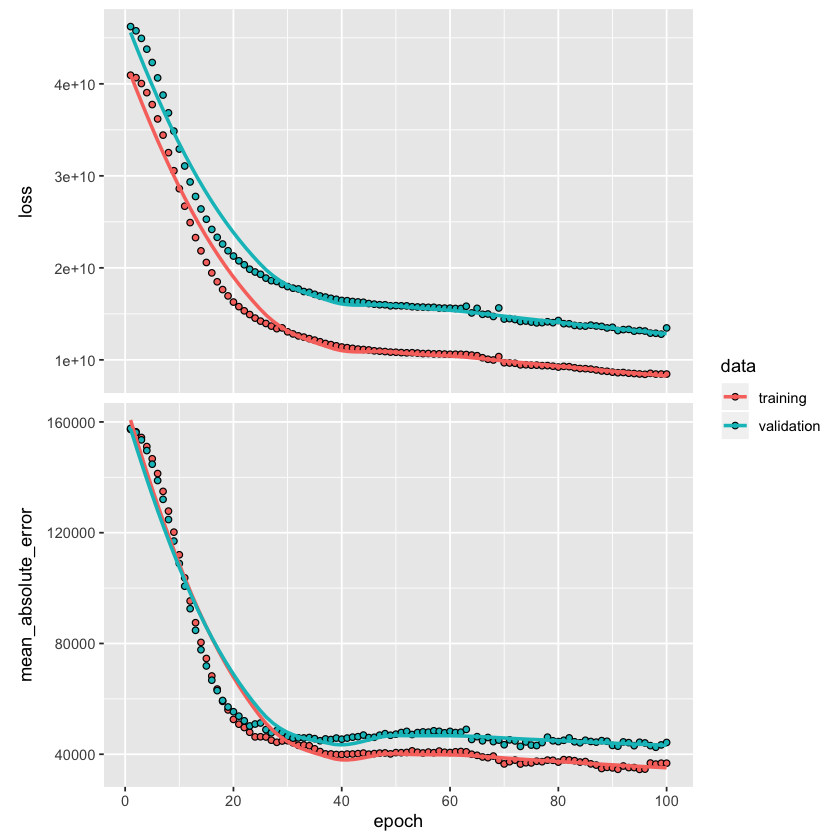

In [6]:
history <- model %>% fit(
  x_train_scaled, y_train, 
  epochs = 100  , batch_size = 10, 
  validation_split = 0.3
)

plot(history)

Finally we can generate predictions from the test set and evaluate the model.

In [7]:
predictions <-  predict(model, x_test_scaled)
results <-  model %>% evaluate(x_test_scaled,y_test, verbose = 0)
paste0("mean absolute error on test set: $", sprintf("%.2f", results$mean_absolute_error ))                   

[1] "mean absolute error on test set: $34352.57"

Looking at the `Mean Absolute Error` plot above, we can see that during the final stages of training, the validation error starts to increase, while the training error continues to decrease. This is the signature of overfitting. We can try to mitigate this by either simplifying the model or using regularisation. Since our model is already quite simple and we don't have too many input features, we will use a combination of dropout and L2 regularisation.

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 9)                       90          
________________________________________________________________________________
dropout (Dropout)                   (None, 9)                       0           
________________________________________________________________________________
dense_4 (Dense)                     (None, 5)                       50          
________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)           (None, 5)                       0           
________________________________________________________________________________
dense_5 (Dense)                     (None, 1)                       6           
Total params: 146
Trainable params: 146
Non-trainable params: 0
_______________________

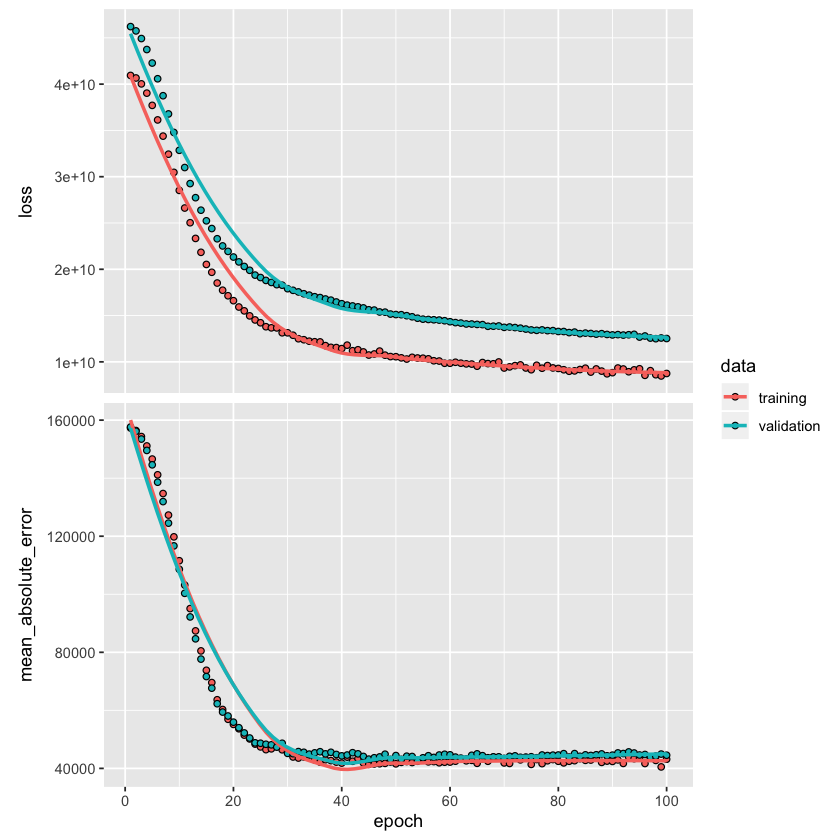

In [8]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 9, activation = 'tanh', input_shape = length(colnames(x_test)), kernel_initializer ='normal',
              kernel_regularizer = regularizer_l2(l = 0.01)) %>% 
  layer_dropout(rate = 0.05) %>%
  layer_dense(units = 5, kernel_initializer ='normal', kernel_regularizer = regularizer_l2(l = 0.01)) %>%
  layer_activation_leaky_relu() %>% 
  layer_dense(units = 1)
summary(model)

model %>% compile(
  loss = 'mse',
  optimizer = optimizer_adam(lr= 0.05),
  metrics = c('mean_absolute_error')
)

history <- model %>% fit(
  x_train_scaled, y_train, 
  epochs = 100  , batch_size = 10, 
  validation_split = 0.3
)

plot(history)

Looking again at the `Mean Absolute Error` plot we can see no signs of overfitting, so the regularisation has worked! Now evaluating again using the test-set.

In [9]:
predictions <-  predict(model, x_test_scaled)
results <-  model %>% evaluate(x_test_scaled,y_test, verbose = 0)
paste0("mean absolute error on test set: $", sprintf("%.2f", results$mean_absolute_error ))

[1] "mean absolute error on test set: $32221.88"

The total error is reduced. The process of finding the ideal parameters for a particular network is not straightforward, not only because there are so many parameters and modules to choose from, but also because the parameters interact. The ideal learning rate for one network architecture may not be the same if we add more layers or implement regularisation techniques. Generally we will start with a simple network with two hidden layers with geometrically decreasing number of neurons. We can then gradually make the network more complex until we see the signs of slight overfitting. Regularisation methods can then be used to improve performance on the test set.

## 7.7 Optimising the Network: Backpropagation

**NB: This section is highly mathematical and is presented only for those curious about the details of the backpropagation algorithm. Those not comfortable in vector calculus can safely skip it**

### 7.7.1 Backpropagation with One Hidden Layer

Using the same notation as above we can write the Mean Squared Error of a network as:

$$C_0 = \frac{1}{n}\sum_{j} (a_j^L-y_j)^2$$

Where $a_j^L$ is the activation of the $j$-th neuron in the $L$-th (output) layer, and $y_j$ is the ground-truth corresponding to the target variable in the training set. The activation of a neuron $j$ in layer $L$ is given by:

$$ a^L_j = \sigma(z^L_j) $$

$$ z^L_j = \sum_k a^{L-1}_k w^L_{jk} + b^L_j $$

We want to find the path of steepest descent in the cost function, so we're interested in calculating the *gradient*, $\nabla C_0$. The gradient is the vector of elements $ \frac{\partial C_0}{\partial w^L_{jk}}$ which has a direction parallel to the path of steepest descent and a magnitude proportional to the rate of change of the cost function in that direction.

Using the chain rule $\frac{\partial x}{\partial z} = \frac{\partial x}{\partial y}\frac{\partial y}{\partial z} $ twice, we get:

$$ \frac{\partial C_0}{\partial w^L_{jk}} = \frac{\partial C_0}{\partial a^L_j} \frac{\partial a^L_j}{\partial z^L_j} \frac{\partial z^L_j}{\partial w^L_{jk}} $$

Each of the derivatives on the RHS is easily evaluated:

$$ \frac{\partial C_0}{\partial a^L_j} = 2(a^L_j-y) $$

$$ \frac{\partial a^L_j}{\partial z^L_j} = \sigma'(z^L_j) $$

$$ \frac{\partial z^L_j}{\partial w^L_{jk}} = a^{L-1}_k $$

And we get:

$$ \frac{\partial C_0}{\partial w^L_{jk}} = 2(a^L_j-y) \sigma'(z^L_j) a^{L-1}_k $$

Having evaluated the gradients, we can easily update the weights $L$ according to the learning step $\alpha$:

$$ w^L_{jk} \rightarrow w^L_{jk} - \alpha \frac{\partial C_0}{\partial w^L_{jk}} $$

To update the weights in the previous layers, we need to propagate the error backwards. We first find the gradient with respect to the activations in the previous layer:

$$ \frac{\partial C_0}{\partial a^{L-1}_k} = \sum_{j=0}^{L-1}  \frac{\partial C_0}{\partial a^L_j} \frac{\partial a^L_j}{\partial z^L_j} \frac{\partial z^L_j}{\partial a^{L-1}_{k}} $$

Which can be evaluated as:

$$ \frac{\partial C_0}{\partial a^{L-1}_k} = \sum_{j=0}^{L-1}  \sigma'(z^L_j)(a^L_j - y) w^L_{jk} $$

Next we need to identify the gradient with respect to the weights in the previous layer. We use the chain rule again and multiply by $\frac{\partial a^{L-1}_k}{\partial w^{L-1}_{ik}} = \sigma'(z^{L-1}_k)a^{L-2}_k$:

$$ \frac{\partial C_0}{\partial w^{L-1}_{ik}} = \sum_{j=0}^{L-1}  \sigma'(z^L_j)(a^L_j - y) w^L_{jk} \sigma'(z^{L-1}_k)a^{L-2}_i $$

And we have the update rule for the hidden layer weights:

$$ w^{L-1}_{jk} \rightarrow w^{L-1}_{jk} - \alpha \frac{\partial C_0}{\partial w^{L-1}_{jk}} $$

The process of updating biases follows a similar procedure, using the chain rule to find the gradient at each step. Finding the gradient with respect to the biases is somewhat easier since $\frac{\partial z^L_j}{\partial b^L_{j}} = 1$.

### 7.7.2 Extending to a Multilayer Network

We can simplify this process by defining the output error $\delta^l_j = \nabla^l_aC_j \circ \sigma'(z^L_j) $, where $\circ$ represents the Hadamard product, or elementwise multiplication of vector elements. This also allows us to generalise to an arbitrary number of layers. Now we can write the output error of a layer in terms of the ourput error of the subsequent layer:

$$ \delta^{l-1}_j = (w^l)^T\delta^l_j \circ \sigma'(z^{l-1}_j) $$

And the gradients in terms of weights can be defined as:

$$\nabla^l_w = \delta^l_j a^{l-1}_k$$

$$\nabla^l_b = \delta^l_j$$

We get the general update rules for backpropagation:

$$ w^{l}_{jk} \rightarrow w^{l}_{jk} - \alpha (w^{l+1})^T \delta^{l+1}_j \circ \sigma'(z^{l}_j) a^{l-1}_k $$

$$ b^{l}_{j} \rightarrow b^{l}_{j} - \alpha (w^{l+1})^T \delta^{l+1}_j \circ \sigma'(z^{l}_j) $$